In [45]:
import pandas as pd
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import random
import time

In [46]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [47]:
df.sample(4)

,Category,Resume
30,Data Science,Skills * Programming Languages: Python (pandas...
859,Blockchain,"KEY SKILLS: Programing languages: C, C++, Pyth..."
751,Hadoop,"â¢ Operating systems:-Linux- Ubuntu, Windows ..."
506,Electrical Engineering,Skills: 1) MC Office 2) AutoCAD 2016 3) Introd...


In [48]:
df.shape

(962, 2)

In [49]:
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

C:\Users\SOHAM\AppData\Local\Temp\ipykernel_8000\3838543356.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




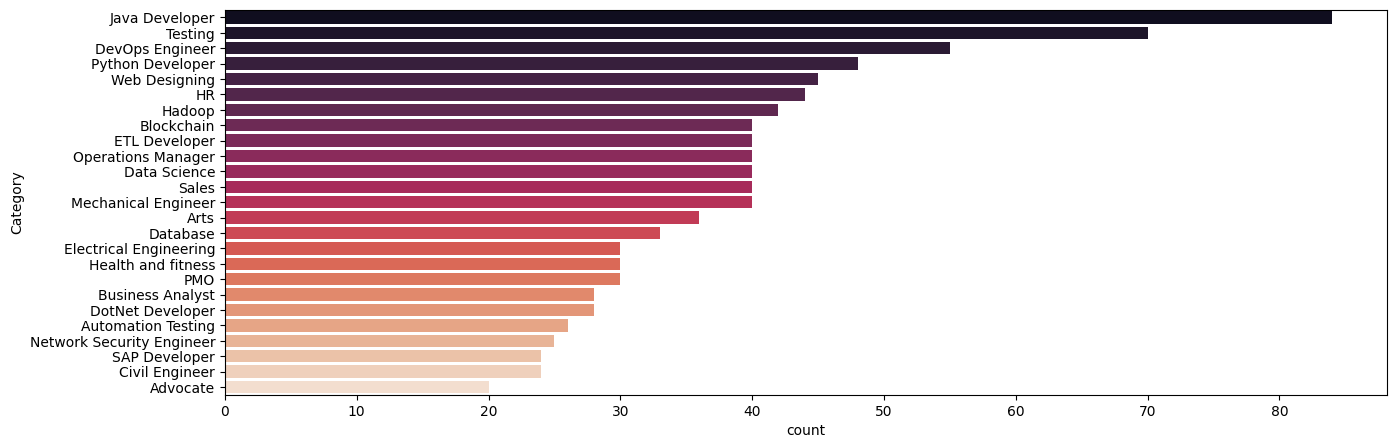

In [50]:
# Set the size of the plot
plt.figure(figsize=(15,5))

# Count the number of resumes in each category and plot a bar chart

bar_plot_values = sns.barplot(x= df["Category"].value_counts(), y = df["Category"].value_counts().index, palette="rocket")

# Display the plot
plt.show()

In [51]:
# Getting job that are tech area
list_tech = ['Java Developer', 'Testing', 'DevOps Engineer', 'Python Developer',
             'Web Designing', 'ETL Developer', 'Data Science', 'SAP Developer',
             'Network Security Engineer', 'Automation Testing', 'DotNet Developer',
             'Hadoop', 'Database', 'Blockchain']

# Created a new column called 'Category Area', that identify if resume does part from certain category
df['Category Area'] = None
df['Category Area'] = df['Category'].apply(lambda category: 'Tech' if category in list_tech else 'Others')

# Sorting columns
df = df.reindex(columns=['Category', 'Category Area', 'Resume'])
df.head()

,Category,Category Area,Resume
0,Data Science,Tech,Skills * Programming Languages: Python (pandas...
1,Data Science,Tech,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,Tech,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Tech,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,Tech,"Education Details \r\n MCA YMCAUST, Faridab..."


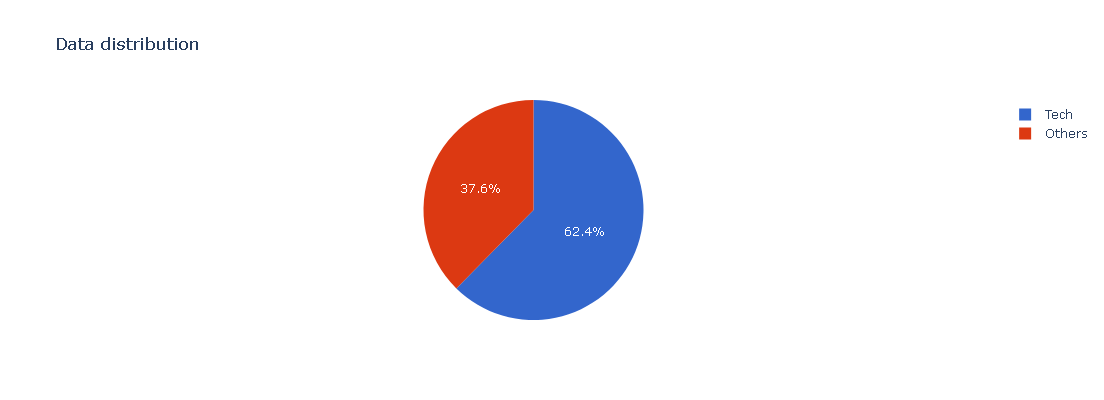

In [52]:

fig = px.pie(df, names='Category Area', title='Data distribution',
             color_discrete_sequence=px.colors.qualitative.G10) # Color: https://plotly.com/python/discrete-color/

fig.update_layout(height=400, width=400)
fig.show()

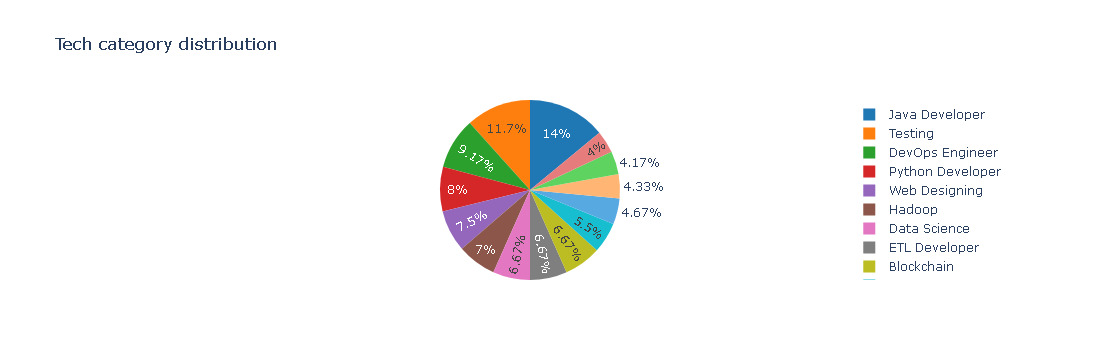

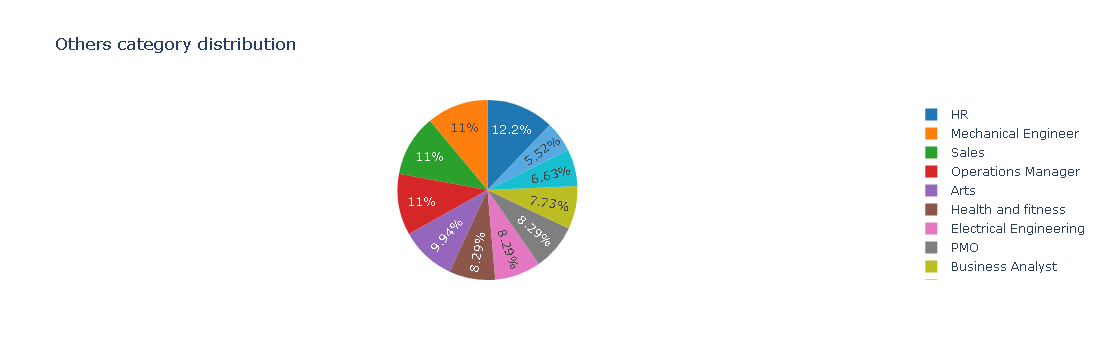

In [53]:
# Here was made a visualization more deeper, to see distribution of category area (tech or others)
df_1 = df[df['Category Area'] == 'Tech']
df_2 = df[df['Category Area'] == 'Others']

fig_1 = px.pie(df_1, names='Category', title='Tech category distribution',
               color_discrete_sequence=px.colors.qualitative.D3) # Color: https://plotly.com/python/discrete-color/

fig_2 = px.pie(df_2, names='Category', title='Others category distribution',
               color_discrete_sequence=px.colors.qualitative.D3)

fig_1.show()
print('')
fig_2.show()

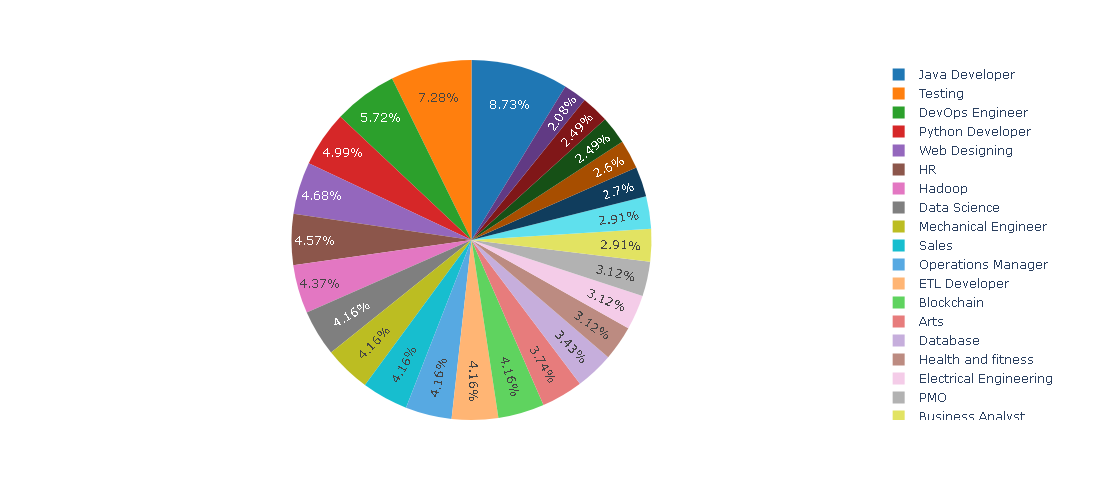

In [54]:
fig3 = px.pie(df,names='Category',color_discrete_sequence=px.colors.qualitative.D3)
fig3.update_layout(height=500, width=700)
fig3.show()

In [55]:
# Here we can see that resumes are duplicates
len_df = len(df)
len_df_resume_uni = len(df['Resume'].unique())
porc_no_duplicate = round(len_df_resume_uni/len_df, 2)

print(len_df, 'is the lenght of lines')
print(len_df_resume_uni, 'are uniques')
print(f'{porc_no_duplicate}% of data aren´t duplicates \n')

# The text has invalid char, then these invalid char can be present in others datas
df['Resume'][3]

962 is the lenght of lines
166 are uniques
0.17% of data aren´t duplicates 



"Skills â\x80¢ R â\x80¢ Python â\x80¢ SAP HANA â\x80¢ Tableau â\x80¢ SAP HANA SQL â\x80¢ SAP HANA PAL â\x80¢ MS SQL â\x80¢ SAP Lumira â\x80¢ C# â\x80¢ Linear Programming â\x80¢ Data Modelling â\x80¢ Advance Analytics â\x80¢ SCM Analytics â\x80¢ Retail Analytics â\x80¢Social Media Analytics â\x80¢ NLP Education Details \r\nJanuary 2017 to January 2018 PGDM Business Analytics  Great Lakes Institute of Management & Illinois Institute of Technology\r\nJanuary 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University\r\nData Science Consultant \r\n\r\nConsultant - Deloitte USI\r\nSkill Details \r\nLINEAR PROGRAMMING- Exprience - 6 months\r\nRETAIL- Exprience - 6 months\r\nRETAIL MARKETING- Exprience - 6 months\r\nSCM- Exprience - 6 months\r\nSQL- Exprience - Less than 1 year months\r\nDeep Learning- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year mo

In [56]:
from IPython.display import clear_output

# Getting unique resumes
unique_resume = df['Resume'].unique().tolist()

# Here it was done an exploration of resume, to find invalid chars
def resume_exp(unique_resume):
  num = 0
  for resume in unique_resume:
      print(num)
      print(resume)
      time.sleep(0.5) # Inserted this line, to try fix a error, basically sometimes output not appear

      inp = input()
      if inp == '':
          clear_output()
          num += 1
      else:
          clear_output()
          break

# Commented to not execute, uncomment to execute function
resume_exp(unique_resume) # Insert any char to stop loop and press enter to continue

In [57]:
invalid_char = ['â¢', 'âª', 'â', 'ï', 'ï', 'ï·',
                'Â', 'Ã¼', 'Ã¼Â', 'Ã±', 'ÃÂ', '·', '*'] # '   ' whitespace

# This text below commeted, was my first attempt used in clean_resume function, however i found a best way such as '^\x00-\x7f]'
''' text = re.sub('â¢', ' ', text)
    text = re.sub('âª', ' ', text)
    text = re.sub('â', ' ', text)
    text = re.sub('Â', ' ', text)
    text = re.sub('Ã¼', ' ', text)
    text = re.sub('Ã¼Â', ' ', text)
    text = re.sub('Ã±', ' ', text)
    text = re.sub('ÃÂ', ' ', text)
    text = re.sub('ï', ' ', text)
    text = re.sub('ï', ' ', text)
    text = re.sub('ï·', ' ', text)'''

# Taking off invalid chars from resume
def clean_resume(text):
    text = re.sub('[^\x00-\x7f]', ' ', text) # https://stackoverflow.com/questions/20889996/how-do-i-remove-all-non-ascii-characters-with-regex-and-notepad no ascii
    text = re.sub('\r', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s+', ' ', text) # Remove whitespace
    text = re.sub(('[%s]' % re.escape(string.punctuation)), ' ', text) # https://medium.com/geekculture/how-to-remove-punctuation-from-text-in-python-7c8790bac4bd
    return text

df['Processed Resume'] = df['Resume'].apply(lambda x: clean_resume(x))

<>:22: SyntaxWarning:

invalid escape sequence '\s'

<>:22: SyntaxWarning:

invalid escape sequence '\s'

C:\Users\SOHAM\AppData\Local\Temp\ipykernel_8000\2117854071.py:22: SyntaxWarning:

invalid escape sequence '\s'



In [59]:
random_number = 580
df['Resume'][random_number]


'â\x80¢ Operating Systems: Windows â\x80¢ Others: MS Excel, MS Office, MS Power Point Key Projects Handled Project Title: fruit sorting and disease detection Client: Kranti Dynamics Team Size: 5 Education Details \r\nJanuary 2014 B.E. Electronics Mumbai, Maharashtra University of Mumbai\r\nPython Developer/analyst \r\n\r\npython developer and data analyst\r\nSkill Details \r\npython scripting,programming,developing- Exprience - 12 months\r\nfrontend  ,html- Exprience - 12 months\r\npython liabrary, numpy,pandas,matplolib,requests,beautiful soap- Exprience - 12 months\r\nmysql- Exprience - 12 months\r\ndjango- Exprience - 12 months\r\nweb scrapping- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Ace The Power of 5\r\ndescription - The Accountabilities:\r\n\r\nâ\x86\x92 Understanding the functional requirements of the application given by the client.\r\n\r\nâ\x86\x92 Participated in walkthroughs of business requirements, functional requirements and technical design to e

In [60]:
df['Processed Resume'][random_number]

' Operating Systems  Windows Others  MS Excel  MS Office  MS Power Point Key Projects Handled Project Title  fruit sorting and disease detection Client  Kranti Dynamics Team Size  5 Education Details January 2014 B E  Electronics Mumbai  Maharashtra University of Mumbai Python Developer analyst python developer and data analyst Skill Details python scripting programming developing  Exprience   12 months frontend  html  Exprience   12 months python liabrary  numpy pandas matplolib requests beautiful soap  Exprience   12 months mysql  Exprience   12 months django  Exprience   12 months web scrapping  Exprience   Less than 1 year monthsCompany Details company   Ace The Power of 5 description   The Accountabilities  Understanding the functional requirements of the application given by the client  Participated in walkthroughs of business requirements  functional requirements and technical design to ensure their testability  Responsible for Software Configuration Management of project delive

In [61]:
# It was realized that all resumes have the text 'Skill Details'
# Above this text 'Skill Details' in any resume has education and current job person
# Below has all experience person
# Basically the cells bellow will get these texts ('Experience', 'Current Job', 'Education')

df['Experience'] = df['Processed Resume'].apply(lambda x: (x.split("Skill Details", 1)[1]))

df['Current Job'] = None
df['Education'] = None

for i in range(0, len(df)):
  educ_and_job = df['Resume'].iloc[i].split('Skill Details', 1)[0]
  educ_and_job_lines = educ_and_job.split('\n')

  df.loc[i, 'Current Job'] = clean_resume('\n'.join(educ_and_job_lines[-4:]))
  df.loc[i, 'Education'] = clean_resume('\n'.join(educ_and_job_lines[:-4]))

In [62]:
random_number = 509
print(df['Education'][random_number],'\n')
print(df['Current Job'][random_number], '\n')
print(df['Experience'][random_number])

Education Details July 2016 to May 2019 BE Electrical And Electronics Engineering Bhopal  Madhya Pradesh RGPV July 2012 to May 2015 Diploma in Electrical Electrical Engineering Bhopal  Madhya Pradesh Rgpv university Bhopal Matric GHS BHULI  

Electrical Engineering  

 Basic Computer  Electrical Machine  Electrical wiring  Solar power Plant  Distribution Substation  Exprience   Less than 1 year monthsCompany Details company   Enigma Business Advisor description   Solar Energy 1  Solar power plant Installation 2  Maintenance Transmission and Distribution Line 1  Installation


In [63]:
# Verify if current job does part from category
list_1 = []
list_2 = []

for i in range(0, len(df)):
  df.loc[i, 'Category'] = df.loc[i, 'Category'].upper()
  df.loc[i, 'Current Job'] = df.loc[i, 'Current Job'].upper()

  if df.loc[i, 'Category'] in df.loc[i, 'Current Job']:
    list_1.append(f"{df.loc[i, 'Category']}, {df.loc[i, 'Current Job']}")
  else:
    list_2.append(f"{df.loc[i, 'Category']}, {df.loc[i, 'Current Job']}")

print(len(set(list(list_1)))) # list_1 or list_2

# Was realized that have 149 current jobs that does part from category
# But the others ones?
# It was realize that the rest was been part, but written with other form
# Like ("Category: DATA SCIENCE", "Current Job: Data scientist")
# It´s the same thing, but written with other form

100


In [65]:
# Merging all into same column
# So it´s necessary create a new column
df['Final Resume'] = None

for i in range(0, len(df)):
  text_1 = f"Education: {df.loc[i, 'Education']} / "
  text_2 = f"Current Job: {df.loc[i, 'Current Job']} /"
  text_3 = f"Experience: {df.loc[i, 'Experience']}"

  df.loc[i, 'Final Resume'] = ' '.join([text_1, text_2, text_3])

# Dropping 'resume' and 'processed resume' columns, because aren´t more necessary
df = df.drop(['Resume', 'Processed Resume'], axis=1)
# Sorting values for a better visualization
df = df.reindex(columns=['Category', 'Category Area', 'Final Resume',
                         'Education', 'Current Job', 'Experience'])

display(df.head())
print('\n')
df['Final Resume'][0]

,Category,Category Area,Final Resume,Education,Current Job,Experience
0,DATA SCIENCE,Tech,Education: Skills Programming Languages Pyt...,Skills Programming Languages Python pandas...,DATA SCIENCE ASSURANCE ASSOCIATE DATA SCIENCE ...,JAVASCRIPT Exprience 24 months jQuery Exp...
1,DATA SCIENCE,Tech,Education: Education Details May 2013 to May 2...,Education Details May 2013 to May 2017 B E UIT...,DATA SCIENTIST DATA SCIENTIST MATELABS,Python Exprience Less than 1 year months S...
2,DATA SCIENCE,Tech,Education: Areas of Interest Deep Learning Co...,Areas of Interest Deep Learning Control Syste...,DATA SCIENCE DATA SCIENCE AND ELECTRICAL ENTHU...,Data Analysis Exprience Less than 1 year m...
3,DATA SCIENCE,Tech,Education: Skills R Python SAP HANA Tableau SA...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,DATA SCIENCE CONSULTANT CONSULTANT DELOITTE ...,LINEAR PROGRAMMING Exprience 6 months RETA...
4,DATA SCIENCE,Tech,Education: Education Details MCA YMCAUST Fari...,Education Details MCA YMCAUST Faridabad Hary...,DATA SCIENCE INTERNSHIP,Data Structure Exprience Less than 1 year ...


'Education: Skills   Programming Languages  Python  pandas  numpy  scipy  scikit learn  matplotlib   Sql  Java  JavaScript JQuery    Machine learning  Regression  SVM  Na ve Bayes  KNN  Random Forest  Decision Trees  Boosting techniques  Cluster Analysis  Word Embedding  Sentiment Analysis  Natural Language processing  Dimensionality reduction  Topic Modelling  LDA  NMF   PCA   Neural Nets    Database Visualizations  Mysql  SqlServer  Cassandra  Hbase  ElasticSearch D3 js  DC js  Plotly  kibana  matplotlib  ggplot  Tableau    Others  Regular Expression  HTML  CSS  Angular 6  Logstash  Kafka  Python Flask  Git  Docker  computer vision   Open CV and understanding of Deep learning Education Details  /  Current Job: DATA SCIENCE ASSURANCE ASSOCIATE DATA SCIENCE ASSURANCE ASSOCIATE   ERNST   YOUNG LLP  / Experience:  JAVASCRIPT  Exprience   24 months jQuery  Exprience   24 months Python  Exprience   24 monthsCompany Details company   Ernst   Young LLP description   Fraud Investigations and 